<a href="https://colab.research.google.com/github/nitish757/ESD/blob/main/A2_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

####EDA

In [129]:
data = pd.read_csv("xor.csv")

In [130]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [131]:
data.duplicated().sum()

0

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   label   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [133]:
data.head()

,X1,X2,label
0,0.295740,0.084965,0.0
1,0.071516,0.281896,0.0
2,0.167992,0.242829,0.0
3,0.007919,0.481756,0.0
4,0.100156,0.447592,0.0


In [134]:
data.shape

(1000, 3)

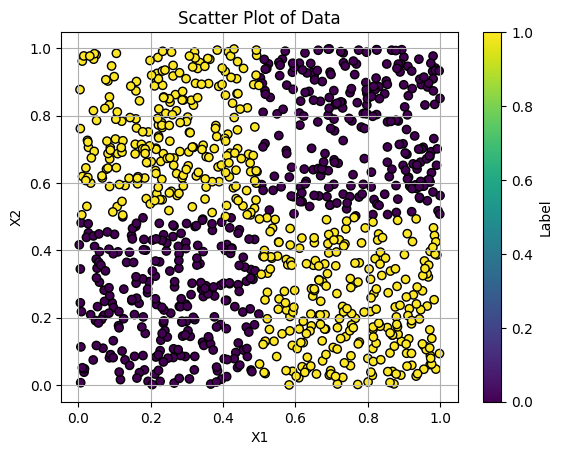

In [135]:
X1=data["X1"]
X2=data["X2"]
Y=data["label"]
plt.scatter(X1, X2, c=Y, cmap='viridis', edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of Data')
plt.colorbar(label='Label')
plt.grid(True)
plt.show()

In [137]:
data.sample()

,X1,X2,label
570,0.388153,0.886486,1.0


In [138]:
data_array = np.array(data)
x = data_array[:, 0:2]
y = data_array[:, -1]

#### Model

##### Activation Function and Derivative

In [139]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [140]:
def sigmoid_derivative(x):
    return x * (1 - x)

##### Training the Model

In [169]:
kf = KFold(n_splits=8, shuffle=True, random_state=42)

accuracies = []
fold = 1

# Iterate over the folds
for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    wt_h1 = np.random.randn(2, 2)* np.sqrt(1 / 2)
    wt_h2 = np.random.randn(2, 2)* np.sqrt(1 / 2)
    wt_out = np.random.randn(2, 1)* np.sqrt(1 / 2)

    b_h1 = np.random.randn(1, 2)* np.sqrt(1 / 2)
    b_h2 = np.random.randn(1, 2)* np.sqrt(1 / 2)
    b_out = np.random.randn(1, 1)* np.sqrt(1 / 2)
    lr = 0.02

    epochs=10000
    for epoch in range(epochs):

      # Forward Propagation
      output_hid = sigmoid(np.dot(X_train, wt_h1) + b_h1)
      output_hid2 = sigmoid(np.dot(output_hid, wt_h2) + b_h2)
      y_pred = sigmoid(np.dot(output_hid2, wt_out) + b_out)

      # loss function
      error = y_train.reshape(-1,1) - y_pred
      loss = np.mean(np.square(error))

      # Backpropagation
      d_output = error * sigmoid_derivative(y_pred)

      error_hid2 = d_output.dot(wt_out.T)
      d_hid2 = error_hid2 * sigmoid_derivative(output_hid2)

      error_hid = d_hid2.dot(wt_h2.T)
      d_hid = error_hid * sigmoid_derivative(output_hid)

      # update weight and bias
      wt_out += output_hid2.T.dot(d_output) * lr
      b_out += np.sum(d_output, axis=0, keepdims=True) * lr

      wt_h2 += output_hid.T.dot(d_hid2) * lr
      b_h2 += np.sum(d_hid2, axis=0, keepdims=True) * lr

      wt_h1 += X_train.T.dot(d_hid) * lr
      b_h1 += np.sum(d_hid, axis=0, keepdims=True) * lr

      if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

    # Test Data
    test_output_hid1 = sigmoid(np.dot(X_test, wt_h1) + b_h1)
    test_output_hid2 = sigmoid(np.dot(test_output_hid1, wt_h2) + b_h2)
    y_pred_test = sigmoid(np.dot(test_output_hid2, wt_out) + b_out)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_test.round())
    accuracies.append(accuracy)

    # Print accuracy per fold
    print(f"Fold {fold}, Accuracy: {accuracy}")
    fold += 1

Epoch 0, Loss: 0.26815027678824954
Epoch 1000, Loss: 0.12250076065967119
Epoch 2000, Loss: 0.12233917652117063
Epoch 3000, Loss: 0.12206911027660126
Epoch 4000, Loss: 0.12136440551696183
Epoch 5000, Loss: 0.12076358141123261
Epoch 6000, Loss: 0.12052880915236848
Epoch 7000, Loss: 0.12039598336690276
Epoch 8000, Loss: 0.12024979619394617
Epoch 9000, Loss: 0.1201062287672815
Fold 1, Accuracy: 0.856
Epoch 0, Loss: 0.25017607197073577
Epoch 1000, Loss: 0.10667607820993245
Epoch 2000, Loss: 0.10550111708803567
Epoch 3000, Loss: 0.10544458860668968
Epoch 4000, Loss: 0.10535659409054068
Epoch 5000, Loss: 0.1052609923147866
Epoch 6000, Loss: 0.10515653036474058
Epoch 7000, Loss: 0.10503627788286615
Epoch 8000, Loss: 0.10490715908250653
Epoch 9000, Loss: 0.10478608005198818
Fold 2, Accuracy: 0.832
Epoch 0, Loss: 0.41183593040399114
Epoch 1000, Loss: 0.2050856229817551
Epoch 2000, Loss: 0.20253935476669202
Epoch 3000, Loss: 0.1207287806020707
Epoch 4000, Loss: 0.1225026001174682
Epoch 5000, Loss

#### Evaluation

In [170]:
# Average Accuracy
average_accuracy = np.mean(accuracies)
print(f"Average Accuracy: {average_accuracy}")

Average Accuracy: 0.9109999999999999
